# Algorithme de Glouton

Fonction versionNo(M : Matrice[Bool]) : Matrice[Bool]
    M1 ← Matrice de même taille que M initialisée à zéro
    
    Pour chaque ligne i de 0 à M.lignes - 1 faire
        Pour chaque colonne j de 0 à M.colonnes - 1 faire
            Si M[i, j] = Vrai Alors
                M1[i, j] ← 1
                M1[j, i] ← 1
            FinSi
        FinPour
    FinPour
    
    Retourner M1
FinFonction

Fonction greedyColoring(adj_matrix : Matrice[Bool], V : Entier) : Liste[Entier]
    result ← Liste d'entiers de taille V initialisée à [-1]
    colors ← Liste de booléens de taille V + 1 initialisée à [Faux, Faux, ..., Faux]

    // Fonction pour marquer les couleurs des voisins comme indisponibles
    Procedure MarkAdjacentColorsUnavailable(u : Entier)
        Pour chaque voisin v de 0 à V-1 faire
            Si adj_matrix[u, v] = Vrai et result[v] ≠ -1 Alors
                colors[result[v]] ← Vrai
            FinSi
        FinPour
    FinProcedure

    // Fonction pour trouver la première couleur disponible
    Fonction FindFirstAvailableColor() : Entier
        cr ← 1
        TantQue (cr ≤ V) et (colors[cr] = Vrai) faire
            cr ← cr + 1
        FinTantQue
        Retourner cr
    FinFonction

    // Assigner les couleurs aux sommets
    Pour chaque sommet u de 0 à V-1 faire
        MarkAdjacentColorsUnavailable(u)
        result[u] ← FindFirstAvailableColor()
        
        // Réinitialiser les couleurs pour la prochaine itération
        Pour chaque voisin v de 0 à V-1 faire
            Si adj_matrix[u, v] = Vrai et result[v] ≠ -1 Alors
                colors[result[v]] ← Faux
            FinSi
        FinPour
    FinPour

    // Afficher le résultat
    Pour chaque sommet u de 0 à V-1 faire
        Afficher "Sommet ", u + 1, " ---> Couleur ", result[u]
    FinPour

    // Coordonnées des sommets
    x ← Liste des coordonnées x des sommets
    y ← Liste des coordonnées y des sommets

    // Création du graphe non orienté
    Afficher le graphe avec les sommets et les arêtes

    Retourner result
FinFonction

complexité: O(V^3) où V est le nombre de sommets dans le graphe

Coloriage du graphe 1
Sommet 1 ---> Couleur 1
Sommet 2 ---> Couleur 2
Sommet 3 ---> Couleur 3
Sommet 4 ---> Couleur 1
Sommet 5 ---> Couleur 2


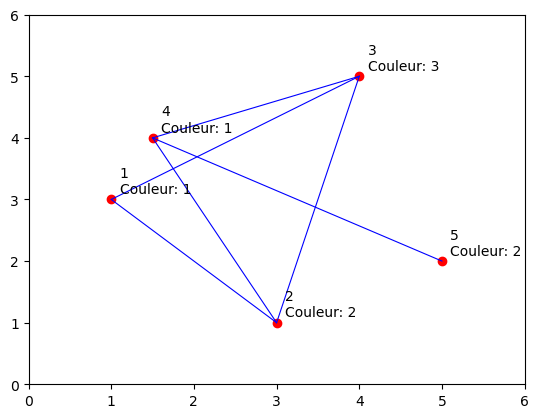


Coloriage du graphe 2
Sommet 1 ---> Couleur 1
Sommet 2 ---> Couleur 2
Sommet 3 ---> Couleur 3
Sommet 4 ---> Couleur 1
Sommet 5 ---> Couleur 4


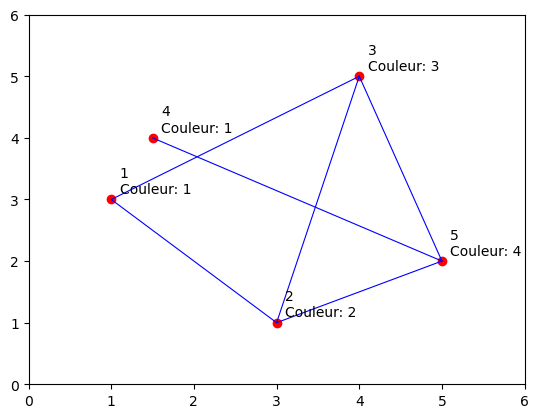

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def versionNo(M):
    M1 = np.zeros((M.shape[0], M.shape[1]))
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if M[i, j] == 1:
                M1[i, j] = 1
                M1[j, i] = 1
    return M1

def greedyColoring(adj_matrix, V):
    # Initialise la liste result avec -1. Cette liste stocke les couleurs attribuées à chaque sommet. Un sommet non coloré est représenté par -1
    result = [-1] * V
    
    # Initialise la liste colors avec False. Elle marque les couleurs déjà utilisées par les voisins d'un sommet. Les indices représentent les couleurs
    colors = [False] * (V + 1)  # Colors array starts from index 1
    
    # Assign colors to vertices
    for u in range(V): # Boucle à travers chaque sommet du graphe
        # Mark all adjacent colors as unavailable
        for i in range(V): # Boucle à travers les sommets voisins du sommet u
            if adj_matrix[u, i] == 1 and result[i] != -1: # Vérifie si u est connecté à i et si i est déjà coloré, marque la couleur de i: indisponible
                colors[result[i]] = True

        # Find the first available color
        cr = 1 # Initialise cr à 1. cr représente la couleur actuelle en cours d'évaluation
        while cr <= V: # Boucle pour trouver la première couleur disponible
            if not colors[cr]: # Vérifie si la couleur cr n'est pas utilisée
                break # Sort de la boucle while si la couleur est disponible
            cr += 1 # Passe à la couleur suivante

        # Assign the color to the vertex
        result[u] = cr # Attribue la couleur cr au sommet u

        # Reset the colors for the next iteration
        for i in range(V): # Réinitialise les couleurs pour la prochaine itération en marquant comme non utilisées les couleurs des voisins déjà colorés
            if adj_matrix[u, i] == 1 and result[i] != -1: # Vérifie si u est connecté à i et si i est déjà coloré, marque la couleur de i: disponible
                colors[result[i]] = False

    # Print the result
    for u in range(V): # Boucle pour afficher les résultats
        print("Sommet", u + 1, "---> Couleur", result[u]) # Affiche le numéro du sommet et la couleur qui lui a été attribuée

    # Coordonnées des sommets
    x = [1, 3, 4, 1.5, 5]
    y = [3, 1, 5, 4, 2]

    # Création du graphe non orienté
    plt.axis([0, 6, 0, 6])
    plt.plot(x, y, color='r', linestyle='', marker='o')

    # Ajout des arêtes non orientées
    N = versionNo(adj_matrix)
    n = len(N)
    for i in range(n):
        for j in range(i + 1, n):
            if N[i, j] == 1:
                plt.plot([x[i], x[j]], [y[i], y[j]], color='b', linestyle='-', linewidth=0.8)

    # Ajout des numéros de sommet et des couleurs à côté de chaque sommet
    for i in range(n):
        plt.text(x[i] + 0.1, y[i] + 0.1, f"{i + 1}\nCouleur: {result[i]}", fontsize=10)
    plt.show()

# Graph 1
g1 = np.array([[0, 1, 1, 0, 0],
               [1, 0, 1, 1, 0],
               [1, 1, 0, 1, 0],
               [0, 1, 1, 0, 1],
               [0, 0, 0, 1, 0]])
print("Coloriage du graphe 1")
greedyColoring(g1, 5)

# Graph 2
g2 = np.array([[0, 1, 1, 0, 0],
               [1, 0, 1, 0, 1],
               [1, 1, 0, 0, 1],
               [0, 0, 0, 0, 1],
               [0, 1, 1, 1, 0]])
print("\nColoriage du graphe 2")
greedyColoring(g2, 5)

# Backtracking

Function printConfiguration(colorArray)
    For i = 1 to V
        Print("Sommet : ", i, " Couleur : ", colorArray[i])

Function isSafe(v, colorArray, vertex)
    For i = 1 to V
        If graph[v][i] == 1 and colorArray[i] == vertex
            Return False
    Return True

Function graphColoringAlgorithmUtil(m, colorArray, currentVertex)
    If currentVertex == V
        Return True

    For i = 1 to m
        If isSafe(currentVertex, colorArray, i) == True
            colorArray[currentVertex] = i
            If graphColoringAlgorithmUtil(m, colorArray, currentVertex + 1) == True
                Return True
            End If
            colorArray[currentVertex] = 0  # backtrack

    Return False

Function graphColoringAlgorithm(colorArray, m)
    colorArray = [0] * V
    If graphColoringAlgorithmUtil(m, colorArray, 0) == False
        Print("La coloration n'est pas possible !")
        Return False

    Print("La coloration est possible !")
    printConfiguration(colorArray)

    # Affichage du graphe
    ...

O(m^V), où m est le nombre de couleurs et V est le nombre de sommets

La coloration est possible !
Les couleurs attribuées sont les suivantes :
Sommet :  1  Couleur :  1
Sommet :  2  Couleur :  2
Sommet :  3  Couleur :  3
Sommet :  4  Couleur :  2


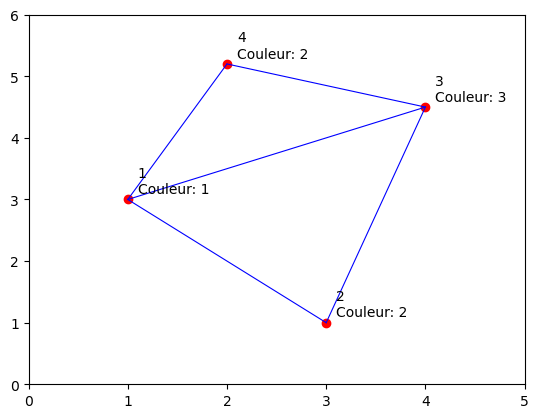

In [5]:
import numpy as np
import matplotlib.pyplot as plt

V = 4  # nombre de sommets

# Fonction pour afficher la configuration de couleurs
"""
Cette fonction prend un tableau colorArray en paramètre, qui représente les couleurs attribuées aux sommets d'un graphe, et elle imprime la 
configuration des couleurs pour chaque sommet.
"""
def printConfiguration(colorArray):
    print("Les couleurs attribuées sont les suivantes :")
    for i in range(V): #  Démarre une boucle for qui parcourt chaque sommet du graphe (représenté par la variable V)
        # À chaque itération, imprime la chaîne "Sommet :", le numéro du sommet, la chaîne "Couleur :", et la couleur attribuée au sommet
        print("Sommet : ", i+1, " Couleur : ", colorArray[i]) 

"""
Cette fonction parcourt les voisins du sommet v dans le graphe et vérifie si la couleur que l'on souhaite attribuer (vertex) est différente de celles 
déjà attribuées à ses voisins. Si la couleur est la même qu'un voisin, la fonction renvoie False, sinon elle renvoie True.
"""
def isSafe(v, colorArray, vertex):
    for i in range(V): # Démarre une boucle for qui parcourt chaque sommet du graphe (représenté par la variable V)
        # Pour chaque sommet i connecté au sommet v (tel que graph[v][i] == 1), vérifie si la couleur attribuée à i est égale à la couleur 'vertex' 
        # que l'on souhaite attribuer au sommet v.
        if graph[v][i] == 1 and colorArray[i] == vertex:
            # Si c'est le cas, cela signifie que le sommet v aurait un voisin avec la même couleur, ce qui rendrait la configuration non valide. 
            # Dans ce cas, la fonction retourne False, indiquant que la couleur 'vertex' ne peut pas être attribuée en toute sécurité au sommet v.
            return False
    # Si la boucle ne trouve aucune paire de voisins ayant la même couleur, la fonction retourne True, indiquant que la couleur 'vertex' peut être 
    # attribuée en toute sécurité au sommet v
    return True

"""
Fonction récursive qui prend l'index actuel, le nombre de sommets, et le tableau de couleurs. Si l'appel récursif renvoie True, alors la coloration est 
possible. Elle renvoie False si les m couleurs ne peuvent pas être attribuées.
"""
def graphColoringAlgorithmUtil(m, colorArray, currentVertex):
    # Cas de base.
    if currentVertex == V: # Si currentVertex est égal au nombre total de sommets V, cela signifie que tous les sommets ont été colorés avec succès, 
        # et la fonction retourne True
        return True

    for i in range(1, m + 1): # Cette boucle for parcourt les couleurs de 1 à m inclusivement
        if isSafe(currentVertex, colorArray, i) == True: # Vérifie si la couleur i peut être attribuée au sommet currentVertex
            colorArray[currentVertex] = i # Attribue la couleur i au sommet currentVertex
            if graphColoringAlgorithmUtil(m, colorArray, currentVertex + 1): # Si l'appel récursif de la fonction pour le sommet suivant renvoie True 
                # (càd que la coloration a réussi pour le reste des sommets)
                return True # La fonction retourne True pour indiquer que la coloration a réussi

            # Sinon, il y a un backtracking. On réinitialise la couleur de currentVertex à 0 (càd qu'aucune couleur n'est attribuée à ce sommet)
            colorArray[currentVertex] = 0 
        # Retour par défaut: Si aucune couleur n'a été attribuée à currentVertex, la fonction retourne False pour indiquer que la coloration avec les 
        # m couleurs spécifiées n'est pas possible pour le graphe

"""
Cette fonction coordonne l'algorithme de coloration de graphes en utilisant une approche récursive de backtracking. Elle prend en compte le nombre 
maximum de couleurs m, initialise le tableau de couleurs colorArray, appelle la fonction récursive graphColoringAlgorithmUtil pour démarrer le processus 
de coloration, et enfin, elle affiche la solution graphiquement.
"""
def graphColoringAlgorithm(colorArray, m):
    # Initialisation du tableau de couleurs avec des zéros. Ce tableau est utilisé pour stocker les couleurs attribuées à chaque sommet du graphe
    colorArray = [0] * V

    # Appel de la fonction graphColoringAlgorithmUtil() pour le sommet 1. Si elle renvoie None, cela signifie que la coloration n'est pas possible
    if graphColoringAlgorithmUtil(m, colorArray, 0) == None:
        print("La coloration n'est pas possible !")
        return False # Termine la fonction en retournant False

    # Affichage de la solution
    print("La coloration est possible !") # Si la coloration est possible, affiche un message indiquant que la coloration est réussie
    printConfiguration(colorArray) # Appelle la fonction printConfiguration pour afficher la configuration des couleurs attribuées à chaque sommet

    # Coordonnées des sommets. Elles sont utilisées pour dessiner le graphe
    x = [1, 3, 4, 2]
    y = [3, 1, 4.5, 5.2]

    # Création du graphe non orienté
    plt.axis([0, 5, 0, 6]) # Définit les limites des axes du graphe
    plt.plot(x, y, color='r', linestyle='', marker='o') # Dessine les sommets du graphe en utilisant des cercles rouges

    # Ajout des arêtes non orientées
    N = versionNo(graph) # Crée une version non orientée du graphe
    n = len(N)
    for i in range(n): # Boucle pour parcourir les sommets
        for j in range(i + 1, n): # Boucle pour parcourir les sommets suivants
            if N[i][j] == 1: # Si le sommet i est connecté au sommet j dans la version non orientée, dessine une arête entre ces sommets
                plt.plot([x[i], x[j]], [y[i], y[j]], color='b', linestyle='-', linewidth=0.8) # Dessine une arête bleue entre les sommets connectés

    # Ajout des numéros de sommet et des couleurs à côté de chaque sommet
    for i in range(n):
        plt.text(x[i] + 0.1, y[i] + 0.1, f"{i + 1}\nCouleur: {colorArray[i]}", fontsize=10)

    plt.show()

graph = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0],
])

m = 3

graphColoringAlgorithm(graph, m)

# Welsh-Powell

Function welsh_powell_algo(adjacency_matrix)
    order = len(adjacency_matrix)
    color_list = [order + 1] * order
    colored_vertex = []
    K = []
    z = []

    For c in range(order)
        For i in range(order)
            For j in range(order)
                If adjacency_matrix[i][j] == 1
                    If i+1 not in colored_vertex
                        z.append(i+1)
        w = max(set(z), key=z.count)

        For j in range(order)
            If adjacency_matrix[w-1][j] == 1
                K.append(color_list[j])

        diff_list = list(set(range(1, order + 1)) - set(K))
        color_list[w-1] = min(diff_list)
        K.clear()
        diff_list.clear()
        colored_vertex.append(w)

        For j in range(order)
            If adjacency_matrix[w-1][j] == 0
                If j+1 not in colored_vertex
                    If color_list[j] == order + 1
                        For i in range(order)
                            If adjacency_matrix[j][i] == 1
                                K.append(color_list[i])
                        If color_list[w-1] not in K
                            color_list[j] = color_list[w-1]
                            colored_vertex.append(j+1)
                            w = j+1
        K.clear()

    result = zip(range(1, order+1), color_list)
    Return dict(result)

O(V²+E), où V est le nombre de sommets et E est le nombre d'arêtes dans le graphe

Couleurs assignées à chaque sommet :
Sommet 1 : Couleur 2
Sommet 2 : Couleur 3
Sommet 3 : Couleur 2
Sommet 4 : Couleur 1
Sommet 5 : Couleur 2
Sommet 6 : Couleur 1
Sommet 7 : Couleur 3


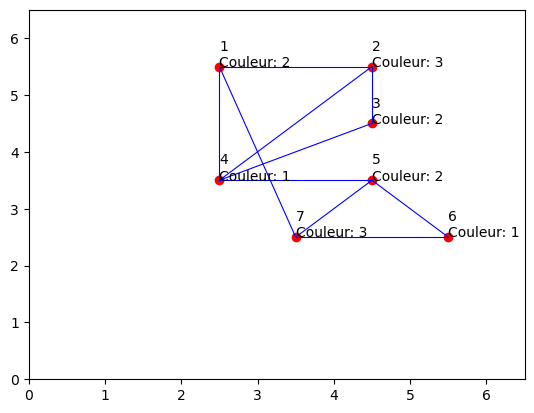

In [16]:
import numpy as np
import matplotlib.pyplot as plt

"""
Cette fonction welsh_powell_algo implémente l'algorithme de coloration de graphes de Welsh-Powell. Cet algorithme attribue des couleurs aux sommets 
d'un graphe de manière à ce que deux sommets adjacents n'aient jamais la même couleur. L'objectif est de minimiser le nombre total de couleurs utilisées
"""
def welsh_powell_algo(adjacency_matrix):
    order = len(adjacency_matrix) # Calcule le nombre de sommets du graphe
    # Initialise une liste color_list avec des valeurs order + 1, représentant les couleurs attribuées à chaque sommet. 
    color_list = [order + 1] * order # Le choix de order + 1 comme couleur initiale permet de détecter les sommets non colorés.
    colored_vertex = [] # Initialise une liste vide pour suivre les sommets déjà colorés
    # Initialise des listes temporaires K et z pour les calculs dans l'algorithme.
    K = []
    z = []

    for c in range(order): # Boucle principale de l'algorithme qui itère pour chaque couleur

        # Trouver le sommet non coloré avec le plus grand nombre d'arêtes non colorées :        
        for i in range(order): # Boucle pour parcourir les sommets du graphe
            for j in range(order): # Boucle pour parcourir les sommets adjacents à chaque sommet
                if adjacency_matrix[i][j] == 1: # Vérifie si les sommets i et j sont adjacents
                    if i+1 not in colored_vertex: # Vérifie si le sommet i n'est pas déjà coloré
                        z.append(i+1) # Les sommets adjacents non colorés sont ajoutés à la liste temporaire  z                    
        w = max(set(z), key=z.count) # Trouve le sommet w avec le plus grand nombre d'arêtes adjacentes non colorées

        # Attribuer des couleurs :       
        for j in range(order): # Boucle pour parcourir les sommets adjacents à w
            if adjacency_matrix[w-1][j] == 1: # Vérifie si le sommet w est adjacent à j
                K.append(color_list[j]) # Ajoute la couleur du sommet j à la liste K (K stocke les couleurs des sommets adjacents à w)
        # Calcule la liste des couleurs disponibles pour le sommet w 
        diff_list = list(set(range(1, order + 1)) - set(K)) # Elle contient toutes les couleurs qui ne sont pas encore utilisées par les voisins du w
        color_list[w-1] = min(diff_list) # Attribue au sommet w la couleur minimale disponible (la plus petite couleur disponible)
        # Nettoie les listes temporaires K et diff_list pour la prochaine itération
        K.clear()
        diff_list.clear()
        colored_vertex.append(w) # Ajoute le sommet w à la liste des sommets colorés
        
        # Coloration des sommets restants :       
        for j in range(order): # Boucle pour parcourir les sommets adjacents à w qui ne sont pas encore colorés
            if adjacency_matrix[w-1][j] == 0: # Vérifie si le sommet w n'est pas adjacent à j
                if j+1 not in colored_vertex: # Vérifie si le sommet j n'est pas déjà coloré
                    if color_list[j] == order + 1: # Vérifie si le sommet j n'est pas encore coloré
                        for i in range(order): # Boucle pour parcourir et vérifier les sommets adjacents à j
                            if adjacency_matrix[j][i] == 1: # Vérifie si le sommet j est adjacent à i
                                K.append(color_list[i]) # Ajoute la couleur du sommet i à la liste K
                        if color_list[w-1] not in K: # Vérifie si la couleur de w n'est pas dans K (la liste des couleurs des sommets adjacents à j)
                            color_list[j] = color_list[w-1] # Attribue au sommet j la couleur de w (j prend la couleur de w)
                            colored_vertex.append(j+1) # Ajoute le sommet j à la liste des sommets colorés
                            w = j+1 # Met à jour w avec le sommet j
            K.clear() # Nettoie la liste temporaire K pour la prochaine itération

    # La fonction renvoie un dictionnaire où les clés sont les numéros de sommet et les valeurs sont les couleurs attribuées
    result = zip(range(1, order+1), color_list) # Crée une séquence de paires (sommet, couleur)
    return dict(result) # Convertit la séquence en un dictionnaire représentant la coloration du graphe

"""
Choix du sommet w avec le maximum d'arêtes adjacentes non colorées : En choisissant w comme le sommet non coloré avec le plus grand nombre d'arêtes 
adjacentes non colorées, on maximise la chance de trouver un sommet qui pourrait potentiellement nécessiter une couleur distincte. Cela contribue à 
minimiser le nombre total de couleurs utilisées.

Attribution de la couleur minimale à w : En attribuant à w la couleur minimale qui n'est pas déjà utilisée par ses voisins, on favorise l'utilisation 
de couleurs inférieures, ce qui contribue à minimiser le nombre total de couleurs nécessaires.
"""

# Créer la matrice d'adjacence du graphe
adjacency_matrix = np.array([
    [0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0]
])

# Appliquer l'algorithme de Welsh-Powell
coloring = welsh_powell_algo(adjacency_matrix)
print("Couleurs assignées à chaque sommet :")
for node, color in coloring.items():
    print(f"Sommet {node} : Couleur {color}")

# Coordonnées des sommets
x = [2.5, 4.5, 4.5, 2.5, 4.5, 5.5, 3.5]
y = [5.5, 5.5, 4.5, 3.5, 3.5, 2.5, 2.5]

# Création du graphe non orienté
plt.axis([0, 6.5, 0, 6.5])
plt.plot(x, y, color='r', linestyle='', marker='o')

# Ajout des arêtes non orientées
for i in range(len(adjacency_matrix)):
    for j in range(i + 1, len(adjacency_matrix)):
        if adjacency_matrix[i][j] == 1:
            plt.plot([x[i], x[j]], [y[i], y[j]], color='b', linestyle='-', linewidth=0.8)

# Ajout des numéros de sommet et des couleurs à côté de chaque sommet
for i in range(len(coloring)):
    plt.text(x[i], y[i], f"{i + 1}\nCouleur: {coloring[i + 1]}", fontsize=10)

plt.show()

# Combinaison de Glouton, BackTracking, et Welsh-Powell


Graph Coloring using Greedy Algorithm:
[1, 2, 1, 3, 1, 2, 3]

Graph Coloring using Backtracking Algorithm:
Graph coloring is possible!
Les couleurs attribuées sont les suivantes :
Sommet :  1  Couleur :  1
Sommet :  2  Couleur :  2
Sommet :  3  Couleur :  1
Sommet :  4  Couleur :  3
Sommet :  5  Couleur :  1
Sommet :  6  Couleur :  2
Sommet :  7  Couleur :  3


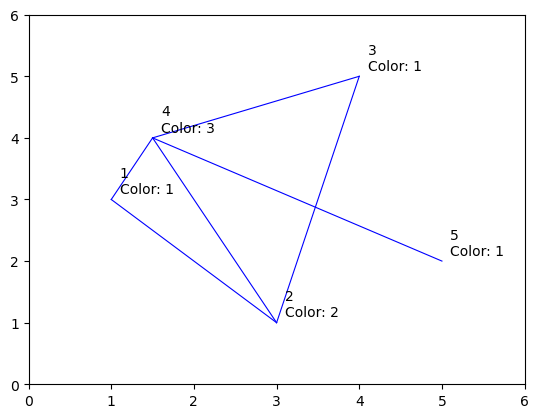

None

Graph Coloring using Welsh-Powell Algorithm:
{1: 2, 2: 3, 3: 2, 4: 1, 5: 2, 6: 1, 7: 3}


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def versionNo(M):
    M1 = np.zeros((M.shape[0], M.shape[1]))
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if M[i, j] == 1:
                M1[i, j] = 1
                M1[j, i] = 1
    return M1

def greedyColoring(adj_matrix, V):
    result = [-1] * V
    colors = [False] * (V + 1)
    
    for u in range(V):
        for i in range(V):
            if adj_matrix[u, i] == 1 and result[i] != -1:
                colors[result[i]] = True

        cr = 1
        while cr <= V:
            if not colors[cr]:
                break
            cr += 1

        result[u] = cr
        for i in range(V):
            if adj_matrix[u, i] == 1 and result[i] != -1:
                colors[result[i]] = False

    return result

def graphColoringAlgorithmUtil(m, colorArray, currentVertex):
    if currentVertex == V:
        return True

    for i in range(1, m + 1):
        if isSafe(currentVertex, colorArray, i):
            colorArray[currentVertex] = i
            if graphColoringAlgorithmUtil(m, colorArray, currentVertex + 1):
                return True
            colorArray[currentVertex] = 0

    return False

def graphColoringAlgorithm(colorArray, m):
    colorArray = [0] * V

    if graphColoringAlgorithmUtil(m, colorArray, 0) is None:
        print("Graph coloring is not possible!")
        return False

    print("Graph coloring is possible!")
    printConfiguration(colorArray)

    x = [1, 3, 4, 1.5, 5]
    y = [3, 1, 5, 4, 2]

    plt.axis([0, 6, 0, 6])
    
    N = versionNo(graph)
    n = len(N)
    
    for i in range(n):
        for j in range(i + 1, n):
            if N[i, j] == 1:
                # Check if indices are within the range of x and y lists
                if i < len(x) and j < len(x):
                    plt.plot([x[i], x[j]], [y[i], y[j]], color='b', linestyle='-', linewidth=0.8)

    for i in range(n):
        # Check if index is within the range of x and y lists
        if i < len(x):
            plt.text(x[i] + 0.1, y[i] + 0.1, f"{i + 1}\nColor: {colorArray[i]}", fontsize=10)

    plt.show()

def welsh_powell_algo(adjacency_matrix):
    order = len(adjacency_matrix)
    color_list = [order + 1] * order
    colored_vertex = []
    K = []
    z = []

    for c in range(order):
        for i in range(order):
            for j in range(order):
                if adjacency_matrix[i][j] == 1:
                    if i + 1 not in colored_vertex:
                        z.append(i + 1)
        w = max(set(z), key=z.count)

        for j in range(order):
            if adjacency_matrix[w - 1][j] == 1:
                K.append(color_list[j])
        diff_list = list(set(range(1, order + 1)) - set(K))
        color_list[w - 1] = min(diff_list)
        K.clear()
        diff_list.clear()
        colored_vertex.append(w)

        for j in range(order):
            if adjacency_matrix[w - 1][j] == 0:
                if j + 1 not in colored_vertex:
                    if color_list[j] == order + 1:
                        for i in range(order):
                            if adjacency_matrix[j][i] == 1:
                                K.append(color_list[i])
                        if color_list[w - 1] not in K:
                            color_list[j] = color_list[w - 1]
                            colored_vertex.append(j + 1)
                            w = j + 1
                K.clear()

    result = zip(range(1, order + 1), color_list)
    return dict(result)
# Get user input for the graph
V = 7
graph = np.array([
    [0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0]
])

# Solve and display the graph coloring
print("\nGraph Coloring using Greedy Algorithm:")
greedy_result = greedyColoring(graph, V)
print(greedy_result)

print("\nGraph Coloring using Backtracking Algorithm:")
m = max(greedy_result)
backtracking_result = graphColoringAlgorithm(greedy_result, m)
print(backtracking_result)

print("\nGraph Coloring using Welsh-Powell Algorithm:")
welsh_powell_result = welsh_powell_algo(graph)
print(welsh_powell_result)

# Graphe Dynamique

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class DynamicGraph:
    def __init__(self):
        self.vertices = {}
        self.edges = set()
        self.colors = {}

    def add_vertex(self, vertex):
        if vertex not in self.vertices:
            self.vertices[vertex] = set()
            self.colors[vertex] = None

    def remove_vertex(self, vertex):
        if vertex in self.vertices:
            self.colors[vertex] = None
            self.edges = {edge for edge in self.edges if vertex not in edge}
            self.edges = {edge - {vertex} for edge in self.edges}
            self.color_connected_component(vertex)
            del self.vertices[vertex]
            del self.colors[vertex]

    def add_edge(self, edge):
        self.edges.add(frozenset(edge))
        for vertex in edge:
            self.vertices[vertex].add(frozenset(edge))

    def remove_edge(self, edge):
        if frozenset(edge) in self.edges:
            for vertex in edge:
                self.color_connected_component(vertex)

            self.edges.remove(frozenset(edge))
            for vertex in edge:
                self.vertices[vertex].remove(frozenset(edge))

    def color_graph(self):
        m = len(self.vertices)
        for vertex in self.vertices:
            if self.colors[vertex] is None:
                self.color_connected_component(vertex)

    def color_connected_component(self, start_vertex):
        queue = deque([start_vertex])
        used_colors = set()
        while queue:
            current_vertex = queue.popleft()
            available_colors = set(range(1, len(self.vertices) + 1))
            for edge in self.vertices[current_vertex]:
                adjacent_vertex = next(iter(set(edge) - {current_vertex}))
                if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is not None:
                    available_colors.discard(self.colors[adjacent_vertex])
            if available_colors:
                # Use the smallest available color
                color = min(available_colors)
                self.colors[current_vertex] = color
                used_colors.add(color)
                for edge in self.vertices[current_vertex]:
                    adjacent_vertex = next(iter(set(edge) - {current_vertex}))
                    if adjacent_vertex in self.colors and self.colors[adjacent_vertex] is None:
                        queue.append(adjacent_vertex)

    def update_graph_after_modification(self, modified_vertex=None, modified_edge=None):
        if modified_vertex:
            self.color_connected_component(modified_vertex)

        if modified_edge:
            for vertex in modified_edge:
                self.color_connected_component(vertex)

    def display_colored_graph(self):
        # Display the colored dynamic graph
        print("\nColored Dynamic Graph:")
        print("Vertices:", self.vertices)
        print("Edges:", self.edges)
        print("Colors:", self.colors)
        
    def chromatic_number(self):
        self.color_graph()
        return len(set(self.colors.values()))
        
# Example 1 of usage
dynamic_graph1 = DynamicGraph()

# Add vertices and edges
dynamic_graph1.add_vertex(1)
dynamic_graph1.add_vertex(2)
dynamic_graph1.add_vertex(3)
dynamic_graph1.add_vertex(4)
dynamic_graph1.add_edge({1, 2})
dynamic_graph1.add_edge({1, 3})
dynamic_graph1.add_edge({1, 4})
dynamic_graph1.add_edge({2, 3})
dynamic_graph1.add_edge({3, 4})

# Display the colored graph 1
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Chromatic Number du graphe 1: ", dynamic_graph1.chromatic_number())

# Remove a vertex
dynamic_graph1.remove_vertex(1)

# Display the colored graph 1 after removal
dynamic_graph1.color_graph()
dynamic_graph1.display_colored_graph()
print("Chromatic Number du graphe 1 après suppression du sommet 1: ", dynamic_graph1.chromatic_number())

# Example 2 of usage
dynamic_graph2 = DynamicGraph()

# Add vertices and edges
dynamic_graph2.add_vertex(1)
dynamic_graph2.add_vertex(2)
dynamic_graph2.add_vertex(3)
dynamic_graph2.add_vertex(4)
dynamic_graph2.add_vertex(5)
dynamic_graph2.add_vertex(6)
dynamic_graph2.add_vertex(7)

dynamic_graph2.add_edge({1, 2})
dynamic_graph2.add_edge({1, 4})
dynamic_graph2.add_edge({1, 7})
dynamic_graph2.add_edge({2, 3})
dynamic_graph2.add_edge({2, 4})
dynamic_graph2.add_edge({3, 4})
dynamic_graph2.add_edge({4, 5})
dynamic_graph2.add_edge({5, 6})
dynamic_graph2.add_edge({5, 7})
dynamic_graph2.add_edge({6, 7})

# Display the colored graph 2
dynamic_graph2.color_graph()
dynamic_graph2.display_colored_graph()
print("Chromatic Number du graphe 2: ", dynamic_graph2.chromatic_number())

# Remove a vertex
dynamic_graph2.remove_vertex(1)

# Display the colored graph 2 after removal
dynamic_graph2.color_graph()
dynamic_graph2.display_colored_graph()
print("Chromatic Number du graphe 2 après suppression du sommet 1: ", dynamic_graph2.chromatic_number())


Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 4}), frozenset({1, 3}), frozenset({1, 2})}, 2: {frozenset({2, 3}), frozenset({1, 2})}, 3: {frozenset({3, 4}), frozenset({1, 3}), frozenset({2, 3})}, 4: {frozenset({3, 4}), frozenset({1, 4})}}
Edges: {frozenset({3, 4}), frozenset({1, 4}), frozenset({2, 3}), frozenset({1, 2}), frozenset({1, 3})}
Colors: {1: 1, 2: 2, 3: 3, 4: 2}
Chromatic Number du graphe 1:  3

Colored Dynamic Graph:
Vertices: {2: {frozenset({2, 3}), frozenset({1, 2})}, 3: {frozenset({3, 4}), frozenset({1, 3}), frozenset({2, 3})}, 4: {frozenset({3, 4}), frozenset({1, 4})}}
Edges: {frozenset({3, 4}), frozenset({2, 3})}
Colors: {2: 2, 3: 3, 4: 2}
Chromatic Number du graphe 1 après suppression du sommet 1:  2

Colored Dynamic Graph:
Vertices: {1: {frozenset({1, 4}), frozenset({1, 7}), frozenset({1, 2})}, 2: {frozenset({2, 4}), frozenset({2, 3}), frozenset({1, 2})}, 3: {frozenset({3, 4}), frozenset({2, 3})}, 4: {frozenset({3, 4}), frozenset({2, 4}), frozenset({1, 4}), froz